In [1]:
import os
import numpy as np
import random as rn

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

import matplotlib.pyplot as plt

# Pre-procesamiento de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos en Keras (incluyendo Droput y Early Stopping)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
#
# Función para graficar resultados
#
def graficar_resultados(historia):
    plt.subplot(1,2,1)
    plt.plot(historia.history['loss'])
    plt.plot(historia.history['val_loss'])
    plt.ylabel('Pérdida')
    plt.xlabel('Iteración')
    plt.legend(['Entrenamiento','Validación'])

    plt.subplot(1,2,2)
    plt.plot(historia.history['accuracy'])
    plt.plot(historia.history['val_accuracy'])
    plt.ylabel('Precisión')
    plt.xlabel('Iteración')
    plt.legend(['Entrenamiento','Validación'])

    ax = plt.gca()
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    plt.show()

In [3]:
#
# Lectura y pre-procesamiento de datos
# 
dataset = np.loadtxt("dataset.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 372us/step - loss: 0.5479 - accuracy: 0.7215 - val_loss: 0.5237 - val_accuracy: 0.7857
Epoch 2/150
614/614 [==============================] - 0s 132us/step - loss: 0.4617 - accuracy: 0.7801 - val_loss: 0.5397 - val_accuracy: 0.7403
Epoch 3/150
614/614 [==============================] - 0s 107us/step - loss: 0.4387 - accuracy: 0.7932 - val_loss: 0.5358 - val_accuracy: 0.7532
Epoch 4/150
614/614 [==============================] - 0s 103us/step - loss: 0.4280 - accuracy: 0.7915 - val_loss: 0.5450 - val_accuracy: 0.7468
Epoch 5/150
614/614 [==============================] - 0s 96us/step - loss: 0.4155 - accuracy: 0.7964 - val_loss: 0.5461 - val_accuracy: 0.7468
Epoch 6/150
614/614 [==============================] - 0s 108us/step - loss: 0.4066 - accuracy: 0.7948 - val_loss: 0.5389 - val_accuracy: 0.7662
Epoch 7/150
614/614 [==============================] - 0s 100us/step - loss: 0.4015 -

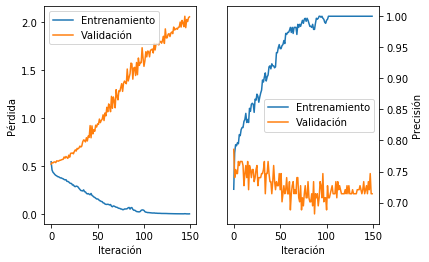

In [4]:

# 1. Modelo de base: 2 capas ocultas con 1000 y 250 neuronas
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)

graficar_resultados(historia)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 264us/step - loss: 0.6318 - accuracy: 0.6987 - val_loss: 0.5686 - val_accuracy: 0.7403
Epoch 2/150
614/614 [==============================] - 0s 63us/step - loss: 0.5256 - accuracy: 0.7655 - val_loss: 0.5224 - val_accuracy: 0.7662
Epoch 3/150
614/614 [==============================] - 0s 70us/step - loss: 0.4804 - accuracy: 0.7655 - val_loss: 0.5071 - val_accuracy: 0.7662
Epoch 4/150
614/614 [==============================] - 0s 70us/step - loss: 0.4596 - accuracy: 0.7720 - val_loss: 0.4990 - val_accuracy: 0.7597
Epoch 5/150
614/614 [==============================] - 0s 65us/step - loss: 0.4473 - accuracy: 0.7752 - val_loss: 0.5060 - val_accuracy: 0.7597
Epoch 6/150
614/614 [==============================] - 0s 40us/step - loss: 0.4406 - accuracy: 0.7834 - val_loss: 0.5131 - val_accuracy: 0.7468
Epoch 7/150
614/614 [==============================] - 0s 42us/step - loss: 0.4367 - accu

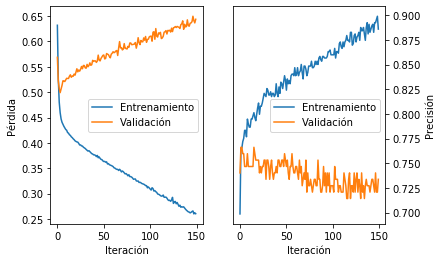

In [5]:
# 2. Modelo simplificado: 1 capa oculta con 100 neuronas
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)

graficar_resultados(historia)

Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 0s 640us/step - loss: 1.6945 - accuracy: 0.6808 - val_loss: 0.7789 - val_accuracy: 0.7468
Epoch 2/10
614/614 [==============================] - 0s 123us/step - loss: 0.9280 - accuracy: 0.7329 - val_loss: 0.6142 - val_accuracy: 0.7792
Epoch 3/10
614/614 [==============================] - 0s 124us/step - loss: 0.7922 - accuracy: 0.7296 - val_loss: 0.9090 - val_accuracy: 0.7078
Epoch 4/10
614/614 [==============================] - 0s 126us/step - loss: 0.6688 - accuracy: 0.7492 - val_loss: 0.6846 - val_accuracy: 0.7403
Epoch 5/10
614/614 [==============================] - 0s 122us/step - loss: 0.6075 - accuracy: 0.7655 - val_loss: 0.7967 - val_accuracy: 0.7468
Epoch 6/10
614/614 [==============================] - 0s 129us/step - loss: 0.7411 - accuracy: 0.7573 - val_loss: 0.7247 - val_accuracy: 0.7922
Epoch 7/10
614/614 [==============================] - 0s 130us/step - loss: 0.6566 - accur

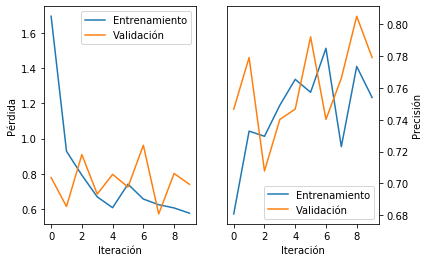

In [6]:
# 3. Modelo base con dropout
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test), verbose=1)

graficar_resultados(historia)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 583us/step - loss: 0.7131 - accuracy: 0.5993 - val_loss: 0.6054 - val_accuracy: 0.7078
Epoch 2/150
614/614 [==============================] - 0s 123us/step - loss: 0.6286 - accuracy: 0.6694 - val_loss: 0.5616 - val_accuracy: 0.7208
Epoch 3/150
614/614 [==============================] - 0s 130us/step - loss: 0.6044 - accuracy: 0.6808 - val_loss: 0.5411 - val_accuracy: 0.7597
Epoch 4/150
614/614 [==============================] - 0s 134us/step - loss: 0.6109 - accuracy: 0.6759 - val_loss: 0.5303 - val_accuracy: 0.7597
Epoch 5/150
614/614 [==============================] - 0s 198us/step - loss: 0.5577 - accuracy: 0.7313 - val_loss: 0.5221 - val_accuracy: 0.7597
Epoch 6/150
614/614 [==============================] - 0s 183us/step - loss: 0.5775 - accuracy: 0.6938 - val_loss: 0.5193 - val_accuracy: 0.7468
Epoch 7/150
614/614 [==============================] - 0s 177us/step - loss: 0.5649 

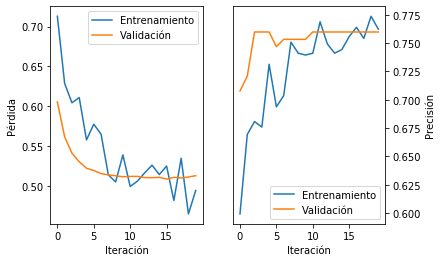

In [7]:
# 4. Modelo con droput y early stopping
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
historia = model.fit(
    x_train, y_train, 
    batch_size=64, 
    epochs=150, 
    validation_data=(x_test,y_test), 
    verbose=1,
    callbacks=[early_stop])

graficar_resultados(historia)